In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from typing import Tuple
from glob import glob

In [146]:
def unzip(x):
    for a,b,c,d in x:
        return [a], [b], [c], [d]
        
class MetricHolder(object):
    def __init__(self, metric_name):
        self.metric_name = metric_name
        self.x = []
        self.avg = []
        self.high = []
        self.low = []
    def add(self, arg:Tuple):
        (epoch_n, avg, high, low) = arg
        self.x.append(epoch_n)
        self.avg.append(avg)
        self.high.append(high)
        self.low.append(low)
    def __call__(self):
        asc_order = sorted(zip(self.x, self.avg, self.high, self.low), key=lambda x: x[0])
        xs = []
        avgs = []
        highs = []
        lows = []
        for x, avg, high, low in asc_order:
            xs.append(x)
            avgs.append(avg)
            highs.append(high)
            lows.append(low)
        return xs, avgs, highs, lows

In [147]:
metrics = ["accuracy", "f1_score", "precision", "recall"]
class Graphable(object):
    def __init__(self, path, *, metrics=metrics):    
        self.metrics = {metric : MetricHolder(metric) for metric in metrics}
        self.path = path
    def append(self, metric_name, *, values):
        self.metrics[metric_name].add(values)
    def get(self, metric_name):
        return self.metrics[metric_name]()

In [148]:
dir = "./logs"
fold_no = 6

variants = {
    "MDN Validation" : Graphable(f"{dir}/MDN_validation_*fold-{fold_no}.csv"),
    "MDN Train" : Graphable(f"{dir}/MDN_train_*fold-{fold_no}.csv"),
    "PRN Validation" : Graphable(f"{dir}/PRN_validation_*fold-{fold_no}.csv"),
    "PRN Train" : Graphable(f"{dir}/PRN_train_*fold-{fold_no}.csv")
}

In [149]:
for key, variant in variants.items():
    for file in glob(variant.path):
        df = pd.read_csv(file)
        for metric in metrics:
            x = int(file.split("_")[-2].split("-")[-1])
            avg = df[metric].mean()
            high = df[metric].max()
            low = df[metric].min()
            variant.append(metric, values=(x,avg,high,low))
            if key == "PRN Validation" and metric == "accuracy":
                print(key,metric,x,avg,high,low)

PRN Validation accuracy 90 0.030545867435515874 0.037353515625 0.0192708333333333
PRN Validation accuracy 194 0.020368691096230157 0.0235595703125 0.015625
PRN Validation accuracy 58 0.03305702814980159 0.04052734375 0.0192708333333333
PRN Validation accuracy 109 0.028777591765873013 0.0360107421875 0.0208333333333333
PRN Validation accuracy 188 0.01993427579365079 0.02294921875 0.0143229166666666
PRN Validation accuracy 44 0.03367358010912698 0.0391845703125 0.0245361328125
PRN Validation accuracy 73 0.03041410900297619 0.03515625 0.021875
PRN Validation accuracy 177 0.020631432911706347 0.0240478515625 0.0147705078125
PRN Validation accuracy 140 0.025540209573412694 0.0291748046875 0.0205078125
PRN Validation accuracy 26 0.035801478794642856 0.042724609375 0.0223388671875
PRN Validation accuracy 11 0.03574490017361111 0.0419921875 0.0200520833333333
PRN Validation accuracy 115 0.02816840277777778 0.0333251953125 0.0192708333333333
PRN Validation accuracy 122 0.02789752294146825 0.034

In [150]:
def plot_variant(graphable, *, metric):
    x, avg, high, low = graphable.get(metric)
    print(x,avg,high,low)
    plt.plot(x, avg)
    plt.scatter(x, avg, marker='o')
    plt.grid(True)
    plt.fill_between(x, high, low, alpha=0.2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.06972147604293914, 0.06682576597436089, 0.06942318769533087, 0.0684347362411923, 0.06953934495875955, 0.06

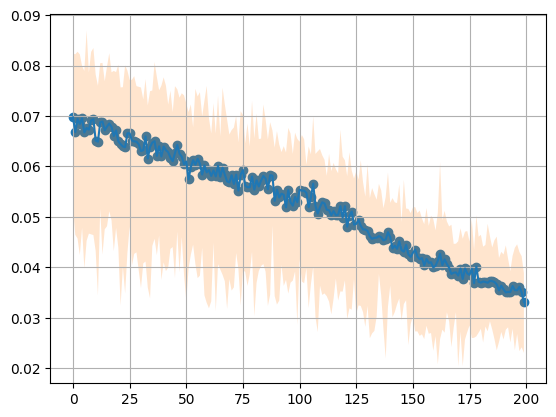

In [151]:
plot_variant(variants["PRN Validation"], metric="f1_score")

In [152]:
#########
# WRONG #
#########
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
# change the dimensions of the graph
plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\n# change the dimensions of the graph\nplt.figure(figsize=(10, 5))\nplt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [153]:
"""
dir = "./logs"
files = os.listdir(dir)
for file in files:
    data = pd.read_csv(dir + "/" + file)
    accuracy_avg.append(np.mean(data["accuracy"].values))
    accuracy_std.append(np.std(data["accuracy"].values))

    f1_score_avg.append(np.mean(data["f1_score"].values))
    f1_score_std.append(np.std(data["f1_score"].values))
    
    precision_avg.append(np.mean(data["precision"].values))
    precision_std.append(np.std(data["precision"].values))
    
    recall_avg.append(np.mean(data["recall"].values))
    recall_std.append(np.std(data["recall"].values))
"""

'\ndir = "./logs"\nfiles = os.listdir(dir)\nfor file in files:\n    data = pd.read_csv(dir + "/" + file)\n    accuracy_avg.append(np.mean(data["accuracy"].values))\n    accuracy_std.append(np.std(data["accuracy"].values))\n\n    f1_score_avg.append(np.mean(data["f1_score"].values))\n    f1_score_std.append(np.std(data["f1_score"].values))\n    \n    precision_avg.append(np.mean(data["precision"].values))\n    precision_std.append(np.std(data["precision"].values))\n    \n    recall_avg.append(np.mean(data["recall"].values))\n    recall_std.append(np.std(data["recall"].values))\n'

In [154]:
# print(len(files), len(accuracy_avg), len(f1_score_avg), len(precision_avg), len(recall_avg))

In [155]:
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
plt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=2)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\nplt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=2)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [156]:
"""
# plotting accuracy with respect to epochs with error fill
plt.figure()
plt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, '-o', color='skyblue')
plt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color='pink', alpha=0.4)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error fill\nplt.figure()\nplt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, \'-o\', color=\'skyblue\')\nplt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color=\'pink\', alpha=0.4)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'